In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


In [115]:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv


--2024-02-21 09:33:11--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.1s    

2024-02-21 09:33:12 (3.87 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [116]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [117]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [118]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [120]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [121]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [122]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [123]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
df.columns = ['labels', 'data']

In [125]:
df

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: >

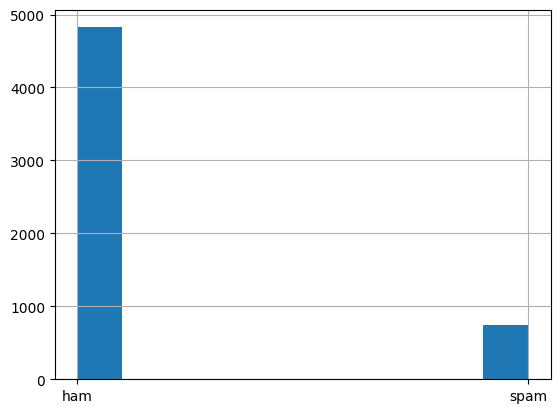

In [126]:
df['labels'].hist()

In [127]:
df.isnull().sum()

labels    0
data      0
dtype: int64

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [151]:
df['labels'] = le.fit_transform(df['labels'])

In [152]:
df

,labels,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [154]:
X = df['data']
y = df['labels']

In [156]:
df_train, df_test, Ytrain, Ytest = train_test_split(X, y, test_size=0.33)

In [161]:
cv = CountVectorizer(decode_error='ignore')
Xtrain = cv.fit_transform(df_train)
Xtest = cv.transform(df_test)

In [162]:
Xtrain

<3733x6967 sparse matrix of type '<class 'numpy.int64'>'
	with 48990 stored elements in Compressed Sparse Row format>

In [163]:
# create the model
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print('Train acc: ', model.score(Xtrain, Ytrain))
print('Test acc: ', model.score(Xtest, Ytest))

Train acc:  0.9930350924189659
Test acc:  0.9820554649265906


In [164]:
df['labels'].value_counts()

0    4825
1     747
Name: labels, dtype: int64

In [167]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print('Train f1: ', f1_score(Ytrain, Ptrain))
print('Test f1: ', f1_score(Ytest, Ptest))


Train f1:  0.9735234215885947
Test f1:  0.9325153374233129


In [171]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print('Train roc_auc: ', roc_auc_score(Ytrain, Prob_train))
print('Test roc_auc: ', roc_auc_score(Ytest, Prob_test))

Train roc_auc:  0.9933089252441542
Test roc_auc:  0.9746525584333544


In [173]:
cm = confusion_matrix(Ytrain,Ptrain)
cm

array([[3229,   13],
       [  13,  478]])

In [174]:
cm_test = confusion_matrix(Ytest, Ptest)
cm_test

array([[1578,    5],
       [  28,  228]])

In [175]:
# see what where getting wrong
X = cv.transform(df['data'])
df['preditions'] = model.predict(X)

In [177]:
# thing that shold be spam
sneaky_spam = df[(df['preditions']==0)& (df['labels']==1)]['data']
for msg in sneaky_spam:
  print(msg)


FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Filthy stories and GIRLS waiting for your
Can U get 

In [178]:
# thing that shold be spam
not_sneaky_spam = df[(df['preditions']==1)& (df['labels']==0)]['data']
for msg in not_sneaky_spam:
  print(msg)

Finally the match heading towards draw as your prediction.
Yes:)from last week itself i'm taking live call.
Are you free now?can i call now?
Waiting for your call.
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
No pic. Please re-send.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Dhoni have luck to win some big title.so we will win:)
